In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('city_day.csv')

In [3]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
def preprocessing(df):
    df['Date']=pd.to_datetime(df['Date'])
    df['Year']=[d.year for d in df['Date']]
    df['Month']=[d.month for d in df['Date']]
    
    df.dropna(subset=['AQI'],inplace=True)
    df=df.drop(['Xylene'],axis=1)
    return df

In [6]:
df=preprocessing(df)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,209.0,Poor,2015,1
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor,2015,1
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,514.0,Severe,2015,1
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,782.0,Severe,2015,2
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,914.0,Severe,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good,2020,6
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory,2020,6
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory,2020,6
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory,2020,6


[Text(0.5, 0, 'PM2.5'),
 Text(1.5, 0, 'PM10'),
 Text(2.5, 0, 'NO'),
 Text(3.5, 0, 'NO2'),
 Text(4.5, 0, 'NOx'),
 Text(5.5, 0, 'NH3'),
 Text(6.5, 0, 'CO'),
 Text(7.5, 0, 'SO2'),
 Text(8.5, 0, 'O3'),
 Text(9.5, 0, 'Benzene'),
 Text(10.5, 0, 'Toluene'),
 Text(11.5, 0, 'AQI')]

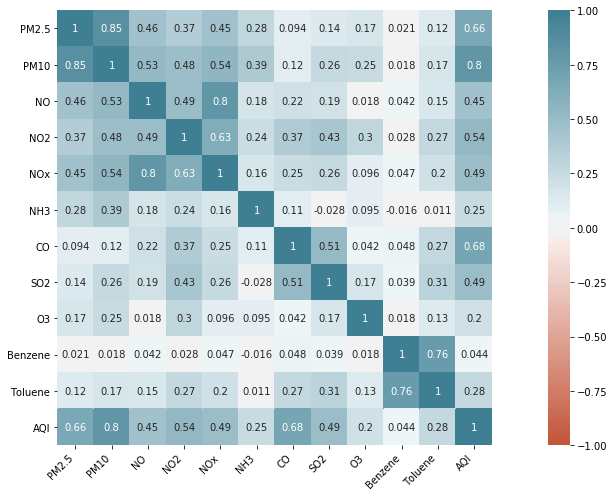

In [7]:
df_corr = df.corr()
df_corr = df_corr.drop(['Year','Month'],axis = 1)
df_corr = df_corr.drop(['Year','Month'],axis = 0)
plt.figure(figsize=(20,8))
ax = sns.heatmap( df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [8]:
cities = df['City'].unique()
cities

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [9]:
delhi = df[df['City'] == 'Delhi']
bengaluru = df[df['City'] == 'Bengaluru']
chennai = df[df['City'] == 'Chennai']
hyderabad = df[df['City'] == 'Hyderabad']

In [10]:
delhi

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472.0,Severe,2015,1
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454.0,Severe,2015,1
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143.0,Moderate,2015,1
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319.0,Very Poor,2015,1
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325.0,Very Poor,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,112.0,Moderate,2020,6
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,196.0,Moderate,2020,6
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,233.0,Poor,2020,6
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,114.0,Moderate,2020,6


In [11]:
delhi.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month
count,1998.000000,1930.000000,1998.000000,1998.000000,1999.000000,1991.000000,1999.000000,1897.000000,1923.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,117.549770,232.902974,39.023544,50.763969,58.809080,42.056595,1.985213,15.912088,51.335892,3.559775,17.266178,259.487744,2017.274637,6.242621
std,82.925457,121.899996,33.446094,22.684770,37.602278,17.301280,2.563180,7.963258,26.059717,2.426925,15.285301,119.537333,1.604895,3.446671
min,10.240000,18.590000,3.570000,10.630000,0.000000,6.780000,0.000000,2.650000,6.940000,0.000000,0.000000,29.000000,2015.000000,1.000000
25%,57.272500,137.157500,15.867500,33.867500,31.570000,31.240000,0.910000,10.380000,33.710000,1.880000,6.710000,161.500000,2016.000000,3.000000
50%,94.980000,217.015000,27.200000,47.150000,53.020000,38.120000,1.250000,14.470000,44.440000,2.970000,12.880000,257.000000,2017.000000,6.000000
75%,153.317500,311.842500,50.980000,63.565000,75.510000,48.810000,1.870000,19.710000,60.825000,4.685000,23.235000,345.500000,2019.000000,9.000000
max,685.360000,796.880000,221.030000,162.500000,254.800000,166.700000,30.440000,71.560000,257.730000,20.640000,103.000000,716.000000,2020.000000,12.000000


In [12]:
bengaluru

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
4373,Bengaluru,2015-03-21,48.59,NaN,3.47,27.00,18.04,28.02,3.89,1.94,52.96,21.33,196.72,91.0,Satisfactory,2015,3
4374,Bengaluru,2015-03-22,47.38,NaN,2.84,22.39,15.33,23.19,11.29,2.05,71.85,14.97,138.20,120.0,Moderate,2015,3
4375,Bengaluru,2015-03-23,65.65,NaN,3.10,26.35,17.45,27.76,9.95,6.30,72.84,9.88,100.77,154.0,Moderate,2015,3
4376,Bengaluru,2015-03-24,60.47,NaN,5.39,29.87,20.88,35.10,1.46,6.07,64.12,5.90,61.48,119.0,Moderate,2015,3
4377,Bengaluru,2015-03-25,62.56,NaN,3.16,23.57,16.39,27.13,10.05,4.98,82.34,4.53,39.99,232.0,Poor,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,Bengaluru,2020-06-27,16.60,29.48,3.06,13.68,13.07,6.88,0.67,7.29,15.69,0.21,1.18,51.0,Satisfactory,2020,6
6299,Bengaluru,2020-06-28,20.44,26.34,2.69,10.33,10.58,6.58,0.66,6.60,17.59,0.12,0.94,61.0,Satisfactory,2020,6
6300,Bengaluru,2020-06-29,28.68,29.27,3.62,12.12,12.94,6.80,0.56,6.33,16.99,0.17,1.17,65.0,Satisfactory,2020,6
6301,Bengaluru,2020-06-30,14.47,24.26,4.61,12.69,15.00,6.82,0.56,6.45,16.08,0.18,0.86,63.0,Satisfactory,2020,6


In [13]:
bengaluru.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month
count,1855.000000,1636.000000,1909.000000,1909.000000,1907.000000,1720.000000,1900.000000,1909.000000,1783.000000,1678.000000,1824.000000,1910.000000,1910.000000,1910.000000
mean,35.871628,83.404444,9.361409,28.308753,19.741274,22.232523,1.669216,5.255631,32.858054,1.759660,4.288333,94.318325,2017.375393,6.428272
std,22.100592,38.070544,7.213873,13.401420,15.327229,12.827410,3.634505,2.522250,18.464787,4.030258,15.588196,39.914934,1.568055,3.400280
min,1.720000,8.220000,0.460000,3.000000,0.000000,0.150000,0.000000,0.730000,1.830000,0.000000,0.000000,20.000000,2015.000000,1.000000
25%,21.305000,56.462500,5.020000,18.990000,7.720000,14.090000,0.720000,3.740000,17.860000,0.430000,1.140000,67.000000,2016.000000,4.000000
50%,30.970000,77.485000,7.540000,27.400000,19.430000,20.000000,0.915000,4.990000,30.460000,0.795000,1.750000,86.000000,2017.000000,6.000000
75%,44.265000,103.937500,11.730000,34.640000,28.825000,26.532500,1.140000,6.360000,45.580000,1.470000,2.900000,111.000000,2019.000000,9.000000
max,313.590000,351.510000,95.190000,142.350000,147.060000,120.070000,48.070000,29.110000,157.200000,47.260000,411.520000,352.000000,2020.000000,12.000000


In [14]:
chennai

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
7916,Chennai,2015-03-24,149.04,NaN,31.23,112.29,12.77,9.68,0.93,14.04,38.67,NaN,8.39,333.0,Very Poor,2015,3
7918,Chennai,2015-03-26,140.21,NaN,16.83,31.79,25.73,10.91,1.41,11.94,44.52,NaN,8.02,318.0,Very Poor,2015,3
7919,Chennai,2015-03-27,266.29,NaN,39.96,50.12,20.48,11.51,1.27,25.45,27.64,NaN,8.35,408.0,Severe,2015,3
7920,Chennai,2015-03-28,88.65,NaN,22.83,38.75,20.64,10.97,2.21,11.76,27.68,NaN,NaN,448.0,Severe,2015,3
7923,Chennai,2015-03-31,51.69,NaN,37.45,46.48,16.09,11.41,1.23,6.53,27.62,NaN,6.94,312.0,Very Poor,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,Chennai,2020-06-27,26.42,39.30,7.25,12.96,19.59,33.20,1.10,7.29,68.51,0.10,0.07,95.0,Satisfactory,2020,6
9839,Chennai,2020-06-28,25.93,45.54,7.81,10.00,16.39,35.98,0.76,6.48,77.45,0.09,0.00,98.0,Satisfactory,2020,6
9840,Chennai,2020-06-29,21.30,22.21,7.65,9.69,16.74,34.07,0.96,6.62,62.57,0.09,0.01,104.0,Moderate,2020,6
9841,Chennai,2020-06-30,24.14,30.66,8.42,12.38,20.29,34.17,1.05,7.50,68.75,0.17,0.16,110.0,Moderate,2020,6


In [15]:
chennai.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month
count,1878.000000,302.000000,1878.000000,1878.000000,1878.000000,1457.000000,1879.000000,1878.000000,1866.000000,1680.000000,1706.000000,1884.000000,1884.000000,1884.000000
mean,50.154366,62.834404,8.767338,16.548647,17.848775,65.433741,1.018973,7.777476,32.356393,1.677845,2.502409,114.502654,2017.402335,6.381104
std,26.062820,49.785339,5.216024,7.497486,7.289002,57.325256,1.245075,4.724911,14.196456,13.345708,8.239211,51.967099,1.563835,3.371365
min,6.550000,0.210000,1.760000,3.730000,4.860000,0.020000,0.000000,0.910000,1.800000,0.000000,0.000000,30.000000,2015.000000,1.000000
25%,33.265000,34.557500,5.782500,11.802500,13.042500,27.480000,0.590000,4.622500,21.732500,0.030000,0.050000,78.000000,2016.000000,4.000000
50%,45.505000,50.245000,7.780000,15.380000,16.820000,46.920000,0.850000,6.465000,30.410000,0.180000,0.790000,100.000000,2017.000000,6.000000
75%,61.340000,71.975000,10.257500,19.540000,20.870000,86.290000,1.090000,9.882500,41.270000,1.075000,2.977500,136.000000,2019.000000,9.000000
max,293.430000,346.730000,59.440000,112.290000,77.570000,352.890000,20.620000,50.510000,92.040000,391.880000,265.980000,449.000000,2020.000000,12.000000


In [16]:
hyderabad

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
14667,Hyderabad,2015-03-31,47.03,NaN,9.71,16.94,26.65,NaN,0.81,13.20,25.13,0.44,4.31,120.0,Moderate,2015,3
14668,Hyderabad,2015-04-01,40.62,NaN,8.41,13.18,21.59,NaN,0.81,7.89,34.19,0.55,3.57,112.0,Moderate,2015,4
14673,Hyderabad,2015-04-06,83.00,NaN,9.72,12.91,22.63,NaN,0.89,8.89,33.67,0.20,2.02,141.0,Moderate,2015,4
14674,Hyderabad,2015-04-07,112.21,NaN,13.85,17.06,31.52,NaN,1.05,11.21,30.68,0.20,1.80,197.0,Moderate,2015,4
14675,Hyderabad,2015-04-08,38.67,NaN,8.38,9.28,17.66,NaN,0.73,7.58,23.53,0.22,2.20,177.0,Moderate,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16582,Hyderabad,2020-06-27,23.29,44.20,6.38,22.64,15.39,9.34,0.36,5.39,24.22,0.88,6.72,58.0,Satisfactory,2020,6
16583,Hyderabad,2020-06-28,15.80,32.18,5.79,22.73,14.89,11.09,0.36,6.36,22.25,0.82,6.48,49.0,Good,2020,6
16584,Hyderabad,2020-06-29,20.24,44.74,3.96,27.59,17.09,13.09,0.38,6.29,19.98,1.31,10.83,47.0,Good,2020,6
16585,Hyderabad,2020-06-30,19.38,41.95,2.63,24.58,14.59,10.80,0.39,5.30,17.40,1.45,13.07,46.0,Good,2020,6


In [17]:
hyderabad.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month
count,1875.000000,1636.000000,1875.000000,1875.000000,1876.000000,1631.000000,1878.000000,1877.000000,1877.000000,1760.000000,1760.000000,1880.000000,1880.000000,1880.000000
mean,47.092885,91.943344,7.565877,28.504208,18.955085,16.159068,0.604127,9.341604,33.664912,1.212403,7.979915,109.207447,2017.405851,6.415957
std,38.613658,40.361154,4.327003,16.088851,9.454499,8.053602,0.524125,7.391710,14.828345,1.349477,9.578616,53.142709,1.562489,3.403401
min,4.830000,10.540000,1.220000,0.620000,0.000000,2.500000,0.000000,0.710000,0.100000,0.000000,0.000000,22.000000,2015.000000,1.000000
25%,25.830000,61.625000,4.690000,15.295000,12.520000,10.540000,0.332500,5.460000,22.480000,0.200000,1.625000,75.000000,2016.000000,4.000000
50%,42.000000,94.485000,6.880000,25.830000,17.535000,14.360000,0.580000,7.100000,32.100000,0.790000,4.475000,104.000000,2017.000000,6.000000
75%,61.395000,117.307500,9.565000,39.195000,24.272500,19.780000,0.780000,9.900000,43.460000,1.630000,9.685000,130.000000,2019.000000,9.000000
max,571.020000,485.880000,40.110000,92.330000,69.420000,78.570000,8.830000,70.390000,98.750000,8.060000,60.020000,737.000000,2020.000000,12.000000


# Year 2020 Analysis

In [18]:
delhi_2020 = delhi[delhi['Year'] == 2020]
bengaluru_2020 = bengaluru[bengaluru['Year'] == 2020]
chennai_2020 = chennai[chennai['Year'] == 2020]
hyderabad_2020 = hyderabad[hyderabad['Year'] == 2020]

In [19]:
delhi_2020

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
12055,Delhi,2020-01-01,372.14,483.87,109.53,64.18,135.00,56.85,3.15,18.49,39.58,8.50,60.79,492.0,Severe,2020,1
12056,Delhi,2020-01-02,327.04,439.31,120.76,64.80,143.71,58.26,3.32,19.95,36.50,9.36,73.11,485.0,Severe,2020,1
12057,Delhi,2020-01-03,228.90,337.04,111.09,55.65,131.13,53.02,2.80,14.93,27.82,6.96,66.80,426.0,Severe,2020,1
12058,Delhi,2020-01-04,220.60,327.22,86.58,57.67,110.20,53.46,2.20,12.85,29.94,6.81,48.18,366.0,Very Poor,2020,1
12059,Delhi,2020-01-05,170.21,257.94,29.99,48.25,54.30,47.94,1.23,9.59,30.21,3.70,28.90,354.0,Very Poor,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,112.0,Moderate,2020,6
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,196.0,Moderate,2020,6
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,233.0,Poor,2020,6
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,114.0,Moderate,2020,6


In [20]:
bengaluru_2020

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
6120,Bengaluru,2020-01-01,30.71,70.80,9.03,27.31,26.74,13.01,1.07,8.56,37.39,1.05,36.19,82.0,Satisfactory,2020,1
6121,Bengaluru,2020-01-02,25.78,62.73,8.81,28.05,30.18,12.40,1.16,7.52,33.11,0.95,34.36,81.0,Satisfactory,2020,1
6122,Bengaluru,2020-01-03,29.66,69.62,6.62,26.26,26.92,12.87,0.99,6.40,32.98,1.06,29.06,85.0,Satisfactory,2020,1
6123,Bengaluru,2020-01-04,52.62,106.81,15.46,31.56,41.89,14.59,1.39,6.94,37.35,1.50,35.36,95.0,Satisfactory,2020,1
6124,Bengaluru,2020-01-05,52.64,97.94,6.86,29.10,29.52,15.68,1.01,7.01,45.10,1.19,39.99,118.0,Moderate,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,Bengaluru,2020-06-27,16.60,29.48,3.06,13.68,13.07,6.88,0.67,7.29,15.69,0.21,1.18,51.0,Satisfactory,2020,6
6299,Bengaluru,2020-06-28,20.44,26.34,2.69,10.33,10.58,6.58,0.66,6.60,17.59,0.12,0.94,61.0,Satisfactory,2020,6
6300,Bengaluru,2020-06-29,28.68,29.27,3.62,12.12,12.94,6.80,0.56,6.33,16.99,0.17,1.17,65.0,Satisfactory,2020,6
6301,Bengaluru,2020-06-30,14.47,24.26,4.61,12.69,15.00,6.82,0.56,6.45,16.08,0.18,0.86,63.0,Satisfactory,2020,6


In [21]:
chennai_2020

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
9660,Chennai,2020-01-01,28.25,40.44,6.69,12.66,18.70,69.17,0.65,12.44,24.79,3.46,0.09,70.0,Satisfactory,2020,1
9661,Chennai,2020-01-02,27.59,23.01,8.99,11.47,19.86,65.15,0.76,7.00,21.31,6.81,0.05,57.0,Satisfactory,2020,1
9662,Chennai,2020-01-03,32.16,36.63,10.43,10.95,20.62,60.39,0.97,10.20,25.52,7.69,1.30,74.0,Satisfactory,2020,1
9663,Chennai,2020-01-04,30.49,44.90,7.95,11.49,18.64,62.05,0.87,8.40,28.40,6.26,0.11,64.0,Satisfactory,2020,1
9664,Chennai,2020-01-05,23.37,30.76,4.80,8.69,13.30,45.46,0.77,7.45,30.88,2.21,0.00,62.0,Satisfactory,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,Chennai,2020-06-27,26.42,39.30,7.25,12.96,19.59,33.20,1.10,7.29,68.51,0.10,0.07,95.0,Satisfactory,2020,6
9839,Chennai,2020-06-28,25.93,45.54,7.81,10.00,16.39,35.98,0.76,6.48,77.45,0.09,0.00,98.0,Satisfactory,2020,6
9840,Chennai,2020-06-29,21.30,22.21,7.65,9.69,16.74,34.07,0.96,6.62,62.57,0.09,0.01,104.0,Moderate,2020,6
9841,Chennai,2020-06-30,24.14,30.66,8.42,12.38,20.29,34.17,1.05,7.50,68.75,0.17,0.16,110.0,Moderate,2020,6


In [22]:
hyderabad_2020

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
16404,Hyderabad,2020-01-01,41.19,69.42,8.24,25.88,19.30,13.79,0.65,4.18,28.71,0.36,1.15,82.0,Satisfactory,2020,1
16405,Hyderabad,2020-01-02,30.80,56.00,8.74,27.43,20.49,13.76,0.61,3.83,22.23,0.38,1.55,64.0,Satisfactory,2020,1
16406,Hyderabad,2020-01-03,33.09,57.88,8.11,25.24,18.87,13.49,0.57,5.53,22.63,0.41,1.42,64.0,Satisfactory,2020,1
16407,Hyderabad,2020-01-04,57.96,106.32,9.94,29.78,22.36,15.35,0.70,6.30,27.61,0.53,2.84,87.0,Satisfactory,2020,1
16408,Hyderabad,2020-01-05,64.52,113.98,10.67,34.05,24.59,15.44,0.57,17.49,29.06,0.59,3.64,112.0,Moderate,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16582,Hyderabad,2020-06-27,23.29,44.20,6.38,22.64,15.39,9.34,0.36,5.39,24.22,0.88,6.72,58.0,Satisfactory,2020,6
16583,Hyderabad,2020-06-28,15.80,32.18,5.79,22.73,14.89,11.09,0.36,6.36,22.25,0.82,6.48,49.0,Good,2020,6
16584,Hyderabad,2020-06-29,20.24,44.74,3.96,27.59,17.09,13.09,0.38,6.29,19.98,1.31,10.83,47.0,Good,2020,6
16585,Hyderabad,2020-06-30,19.38,41.95,2.63,24.58,14.59,10.80,0.39,5.30,17.40,1.45,13.07,46.0,Good,2020,6


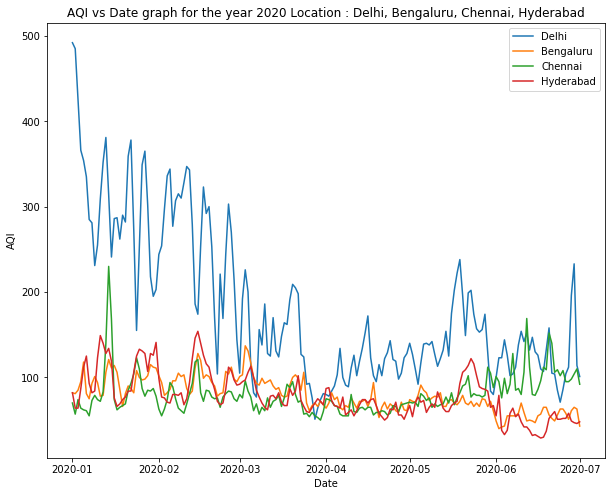

In [23]:
#Plotting the AQI vs Date graph for  Delhi, Bengaluru, Chennai and Hyderabad

plt.figure(figsize=(10,8))
plt.plot(delhi_2020['Date'],delhi_2020['AQI'])
plt.plot(bengaluru_2020['Date'],bengaluru_2020['AQI'])
plt.plot(chennai_2020['Date'],chennai_2020['AQI'])
plt.plot(hyderabad_2020['Date'],hyderabad_2020['AQI'])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI vs Date graph for the year 2020 Location : Delhi, Bengaluru, Chennai, Hyderabad")
plt.legend(["Delhi","Bengaluru","Chennai","Hyderabad"])

[]

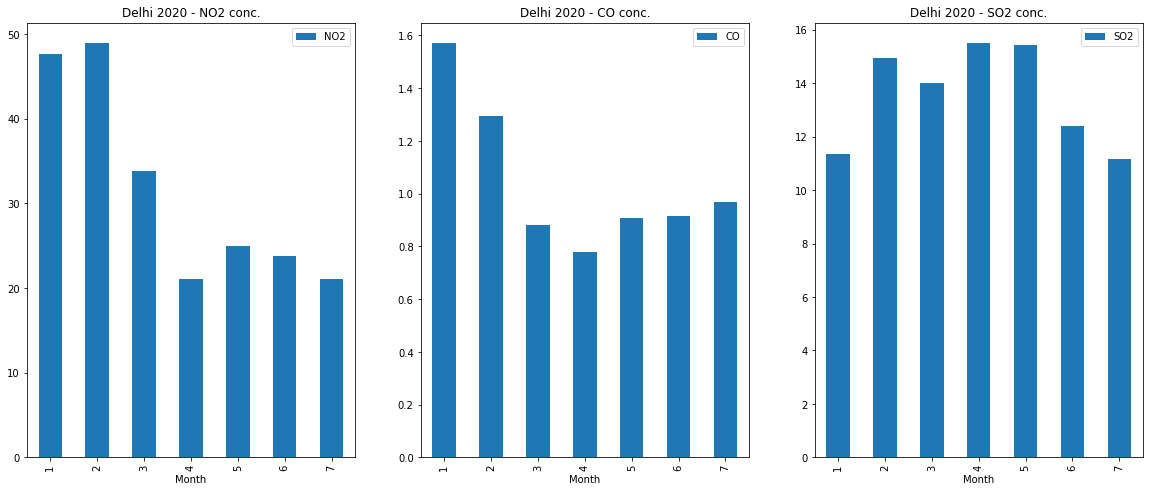

In [24]:
#Plotting the NO2, CO and SO2 concentrations in the city of Delhi

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,8))
ax1.title.set_text("Delhi 2020 - NO2 conc.")
delhi_2020.groupby(delhi_2020['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax1)
ax2.title.set_text("Delhi 2020 - CO conc.")
delhi_2020.groupby(delhi_2020['Month']).mean().plot(y = ['CO'],kind = 'bar',ax = ax2)
ax3.title.set_text("Delhi 2020 - SO2 conc.")
delhi_2020.groupby(delhi_2020['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax = ax3)

plt.plot()

[]

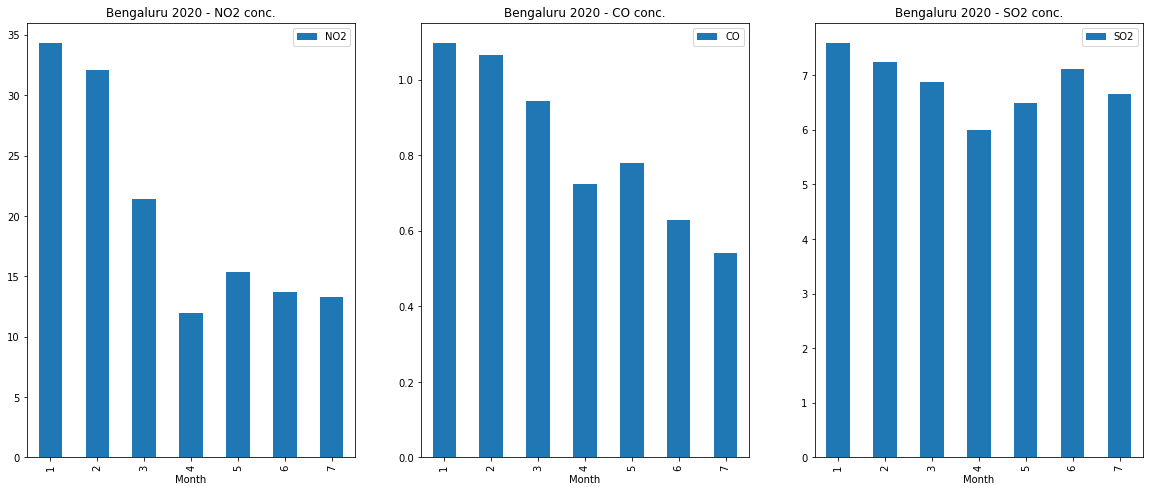

In [25]:
#Plotting the NO2, CO and SO2 concentrations in the city of Bengaluru

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,8))
ax1.title.set_text("Bengaluru 2020 - NO2 conc.")
bengaluru_2020.groupby(bengaluru_2020['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax1)
ax2.title.set_text("Bengaluru 2020 - CO conc.")
bengaluru_2020.groupby(bengaluru_2020['Month']).mean().plot(y = ['CO'],kind = 'bar',ax = ax2)
ax3.title.set_text("Bengaluru 2020 - SO2 conc.")
bengaluru_2020.groupby(bengaluru_2020['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax = ax3)

plt.plot()

[]

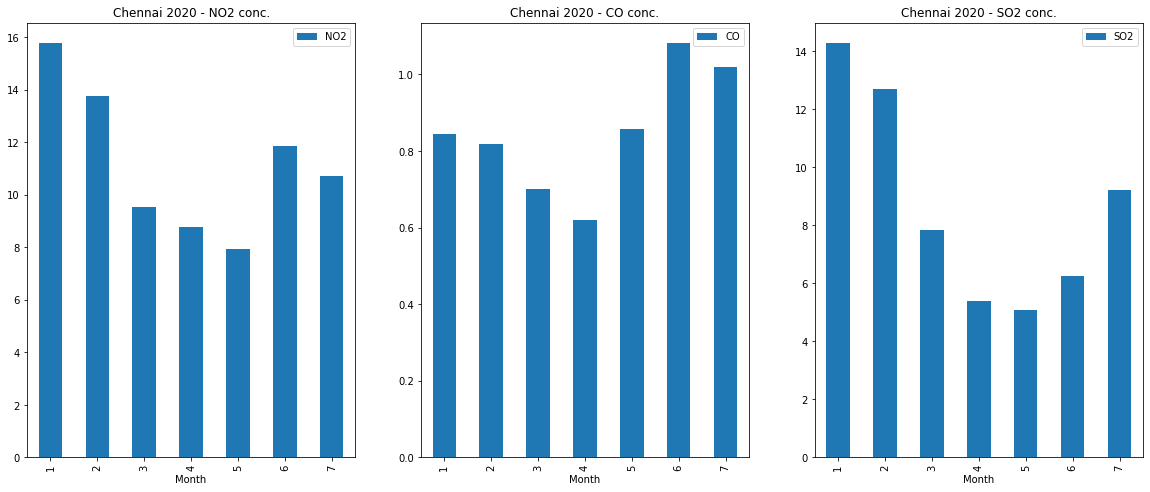

In [26]:
#Plotting the NO2, CO and SO2 concentrations in the city of Chennai

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,8))
ax1.title.set_text("Chennai 2020 - NO2 conc.")
chennai_2020.groupby(chennai_2020['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax1)
ax2.title.set_text("Chennai 2020 - CO conc.")
chennai_2020.groupby(chennai_2020['Month']).mean().plot(y = ['CO'],kind = 'bar',ax = ax2)
ax3.title.set_text("Chennai 2020 - SO2 conc.")
chennai_2020.groupby(chennai_2020['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax = ax3)

plt.plot()

[]

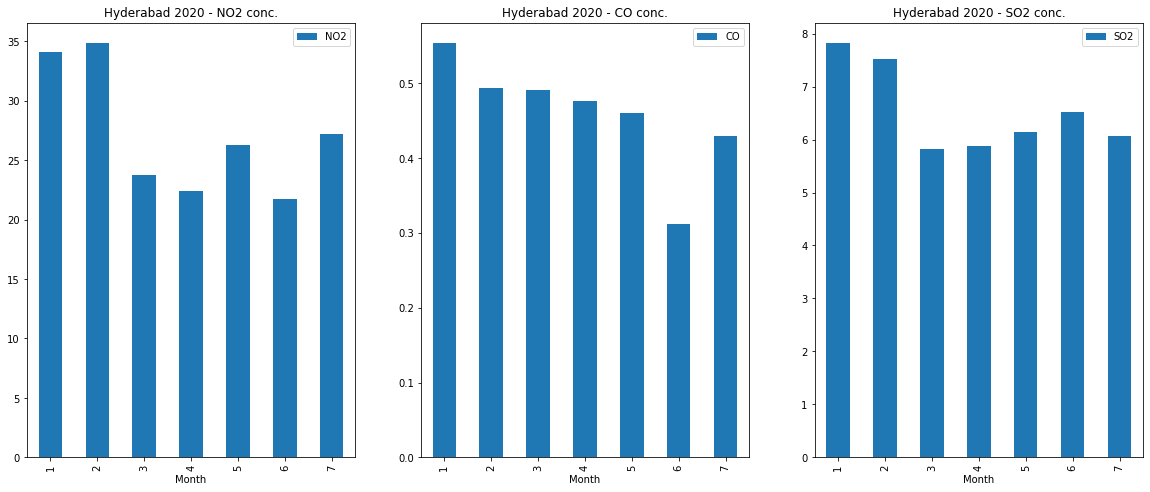

In [27]:
#Plotting the NO2, CO and SO2 concentrations in the city of Hyderabad

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,8))
ax1.title.set_text("Hyderabad 2020 - NO2 conc.")
hyderabad_2020.groupby(hyderabad_2020['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax1)
ax2.title.set_text("Hyderabad 2020 - CO conc.")
hyderabad_2020.groupby(hyderabad_2020['Month']).mean().plot(y = ['CO'],kind = 'bar',ax = ax2)
ax3.title.set_text("Hyderabad 2020 - SO2 conc.")
hyderabad_2020.groupby(hyderabad_2020['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax = ax3)

plt.plot()

In [28]:
delhi_2020.groupby(delhi_2020['Month']).mean()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year
Month,,,,,,,,,,,,,
1,157.112581,238.522903,47.913871,47.604839,69.343871,44.219355,1.570323,11.366452,26.304516,4.598065,30.737097,308.451613,2020
2,121.484138,219.875517,39.056552,48.892759,62.027586,38.544483,1.295172,14.945172,37.457241,4.058966,23.896552,262.137931,2020
3,57.506452,122.189032,21.949677,33.779355,38.555484,31.798710,0.881290,14.000000,37.859355,2.346129,20.715806,135.838710,2020
4,44.940000,104.877667,9.710000,21.008333,20.548000,27.784000,0.780333,15.493667,46.185667,1.635000,10.364000,113.000000,2020
5,55.448710,137.662258,9.770323,24.903871,22.486774,29.725484,0.908387,15.425161,56.768065,1.740000,13.970968,148.645161,2020
6,46.694667,121.209333,8.458667,23.726667,21.125667,32.770667,0.915667,12.402000,39.616000,1.837333,19.002000,125.733333,2020
7,54.010000,128.660000,6.330000,21.050000,16.810000,29.060000,0.970000,11.150000,29.730000,2.030000,23.570000,101.000000,2020


In [29]:
bengaluru_2020.groupby(bengaluru_2020['Month']).mean()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year
Month,,,,,,,,,,,,,
1,39.313226,83.495161,8.653226,34.301290,35.883548,14.283871,1.096452,7.580323,39.277742,0.736129,11.489355,95.322581,2020
2,41.607241,92.368966,6.977241,32.095862,32.971379,13.312759,1.066552,7.236897,40.929655,0.513103,1.811379,96.482759,2020
3,38.193226,79.966452,4.790968,21.364194,23.149032,12.523226,0.943226,6.867097,44.945484,0.348065,1.524839,90.741935,2020
4,24.931667,46.863000,2.886667,11.981000,13.224333,10.953000,0.724000,5.991000,40.517333,0.290333,4.980000,68.533333,2020
5,21.269677,59.758710,3.706774,15.389032,15.594194,8.918065,0.780000,6.478065,32.435806,0.300645,1.648065,73.161290,2020
6,18.035333,41.063000,4.894000,13.730333,15.115000,6.261667,0.628333,7.101667,16.244667,0.569333,1.916000,55.166667,2020
7,17.500000,30.480000,3.950000,13.250000,14.830000,7.420000,0.540000,6.660000,15.400000,0.270000,0.650000,43.000000,2020


In [30]:
chennai_2020.groupby(chennai_2020['Month']).mean()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year
Month,,,,,,,,,,,,,
1,44.229677,64.410968,8.737419,15.766452,23.790645,52.058065,0.844839,14.273871,29.704516,1.502258,0.072581,87.516129,2020
2,37.013448,67.577586,9.084138,13.747586,21.562759,53.021034,0.817586,12.712759,28.166552,1.650000,0.022414,78.137931,2020
3,31.876774,42.870333,8.435484,9.533548,17.032903,49.520645,0.700323,7.834839,31.817097,2.495806,0.090000,70.290323,2020
4,15.453333,174.091111,6.526333,8.774667,13.529000,43.890000,0.618667,5.399667,36.497000,0.314667,0.002000,63.500000,2020
5,18.899355,177.027500,6.445806,7.926774,13.756452,38.194194,0.856774,5.096774,46.672258,0.172258,0.024516,78.677419,2020
6,29.448667,53.957241,9.086667,11.837667,19.783333,37.867333,1.081333,6.242000,58.940333,0.095333,0.033333,103.066667,2020
7,15.950000,4.850000,6.220000,10.720000,16.440000,33.520000,1.020000,9.230000,48.370000,0.090000,0.000000,92.000000,2020


In [31]:
hyderabad_2020.groupby(hyderabad_2020['Month']).mean()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year
Month,,,,,,,,,,,,,
1,52.322581,104.006452,10.571613,34.109355,25.248065,18.250000,0.553226,7.817097,28.283871,0.386774,2.460323,104.548387,2020
2,43.746552,98.053793,12.570690,34.823448,27.045862,20.284828,0.493793,7.524138,28.110000,0.939310,6.873103,94.965517,2020
3,35.884839,80.470968,8.240323,23.719677,18.140645,13.950323,0.490645,5.828387,26.851935,2.045806,9.912258,78.741935,2020
4,30.010333,59.741000,7.852000,22.405000,16.786000,14.329000,0.476333,5.885667,28.036333,1.307667,6.950000,65.000000,2020
5,30.117742,80.478065,6.007097,26.234839,17.748710,13.455484,0.460645,6.144839,31.244516,1.628387,11.725161,79.354839,2020
6,18.634333,45.096333,6.046333,21.728000,15.230000,14.946333,0.311667,6.520667,18.500000,0.790667,5.519333,47.066667,2020
7,26.830000,66.500000,2.940000,27.180000,16.130000,9.320000,0.430000,6.070000,13.200000,1.310000,16.510000,48.000000,2020


# Delhi AQI Year Analysis

In [32]:
delhi_2019 = delhi[delhi['Year'] == 2019]
delhi_2018 = delhi[delhi['Year'] == 2018]
delhi_2017 = delhi[delhi['Year'] == 2017]
delhi_2016 = delhi[delhi['Year'] == 2016]
delhi_2015 = delhi[delhi['Year'] == 2015]

[]

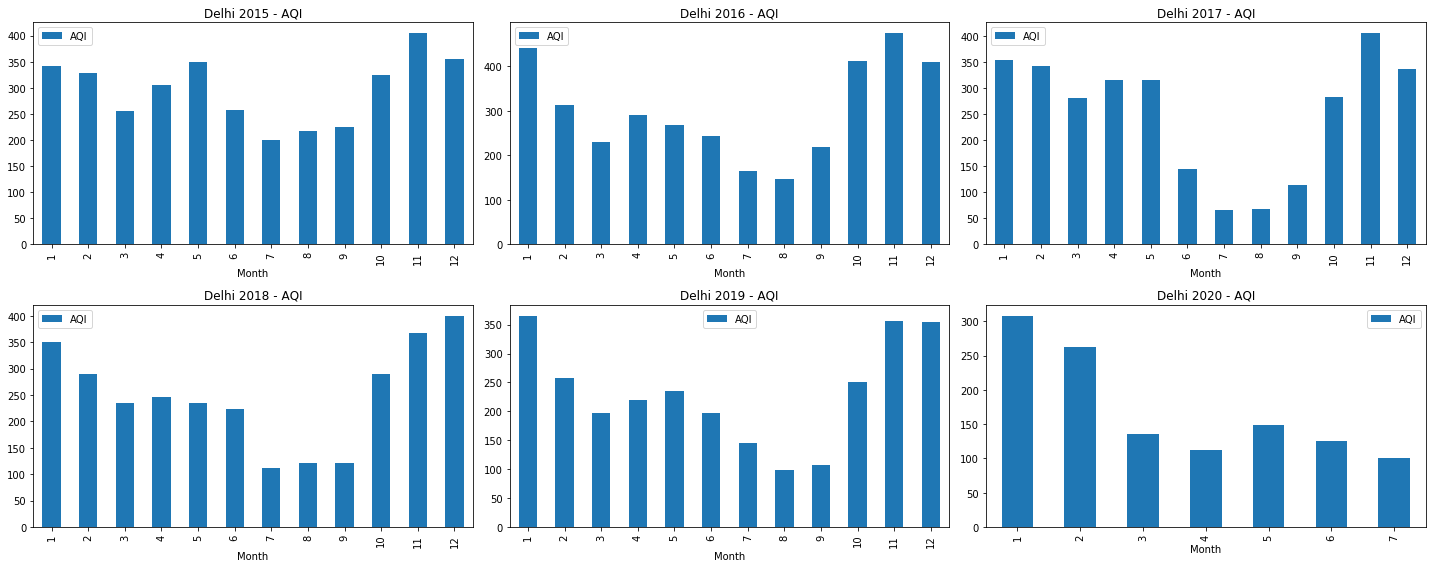

In [33]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (20,8))

ax1.title.set_text("Delhi 2015 - AQI")
delhi_2015.groupby(delhi_2015['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax1)

ax2.title.set_text("Delhi 2016 - AQI")
delhi_2016.groupby(delhi_2016['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax2)

ax3.title.set_text("Delhi 2017 - AQI")
delhi_2017.groupby(delhi_2017['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax3)

ax4.title.set_text("Delhi 2018 - AQI")
delhi_2018.groupby(delhi_2018['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax4)

ax5.title.set_text("Delhi 2019 - AQI")
delhi_2019.groupby(delhi_2019['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax = ax5)

ax6.title.set_text("Delhi 2020 - AQI")
delhi_2020.groupby(delhi_2020['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax = ax6)

plt.tight_layout()
plt.plot()

# Bengaluru AQI Year Analysis

In [34]:
bengaluru_2019 = bengaluru[bengaluru['Year'] == 2019]
bengaluru_2018 = bengaluru[bengaluru['Year'] == 2018]
bengaluru_2017 = bengaluru[bengaluru['Year'] == 2017]
bengaluru_2016 = bengaluru[bengaluru['Year'] == 2016]
bengaluru_2015 = bengaluru[bengaluru['Year'] == 2015]

[]

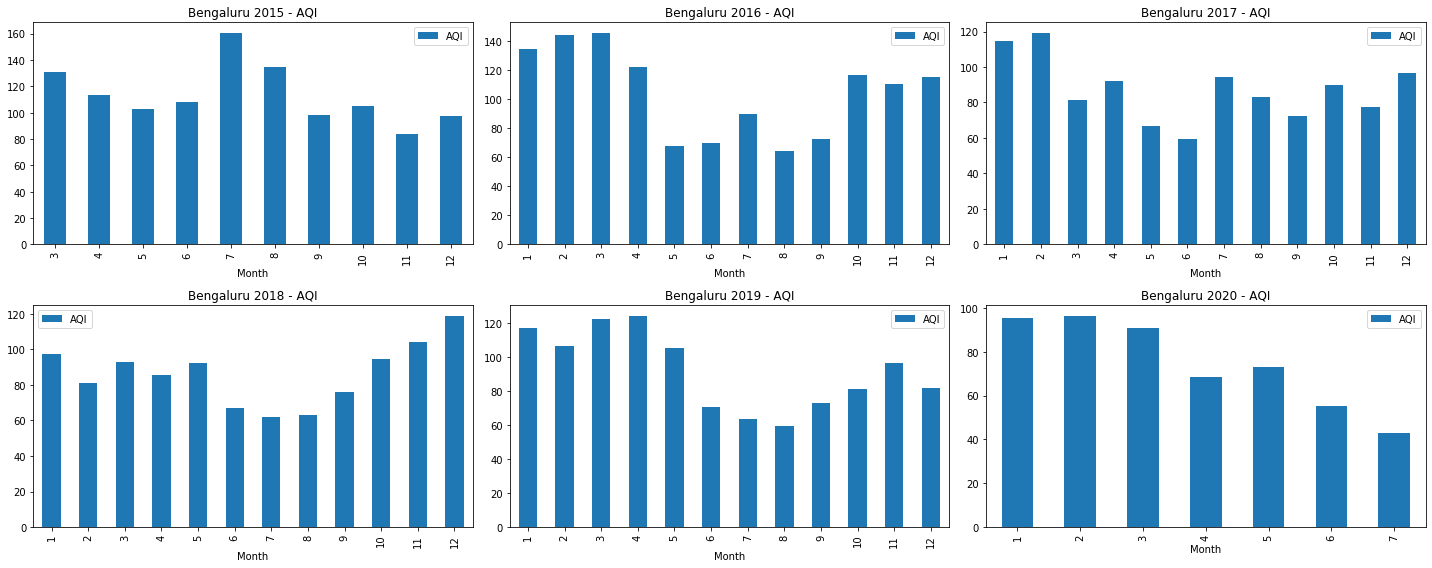

In [35]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (20,8))

ax1.title.set_text("Bengaluru 2015 - AQI")
bengaluru_2015.groupby(bengaluru_2015['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax1)

ax2.title.set_text("Bengaluru 2016 - AQI")
bengaluru_2016.groupby(bengaluru_2016['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax2)

ax3.title.set_text("Bengaluru 2017 - AQI")
bengaluru_2017.groupby(bengaluru_2017['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax3)

ax4.title.set_text("Bengaluru 2018 - AQI")
bengaluru_2018.groupby(bengaluru_2018['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax4)

ax5.title.set_text("Bengaluru 2019 - AQI")
bengaluru_2019.groupby(bengaluru_2019['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax = ax5)

ax6.title.set_text("Bengaluru 2020 - AQI")
bengaluru_2020.groupby(bengaluru_2020['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax = ax6)

plt.tight_layout()
plt.plot()

# Chennai AQI Year Analysis

In [36]:
chennai_2019 = chennai[chennai['Year'] == 2019]
chennai_2018 = chennai[chennai['Year'] == 2018]
chennai_2017 = chennai[chennai['Year'] == 2017]
chennai_2016 = chennai[chennai['Year'] == 2016]
chennai_2015 = chennai[chennai['Year'] == 2015]

[]

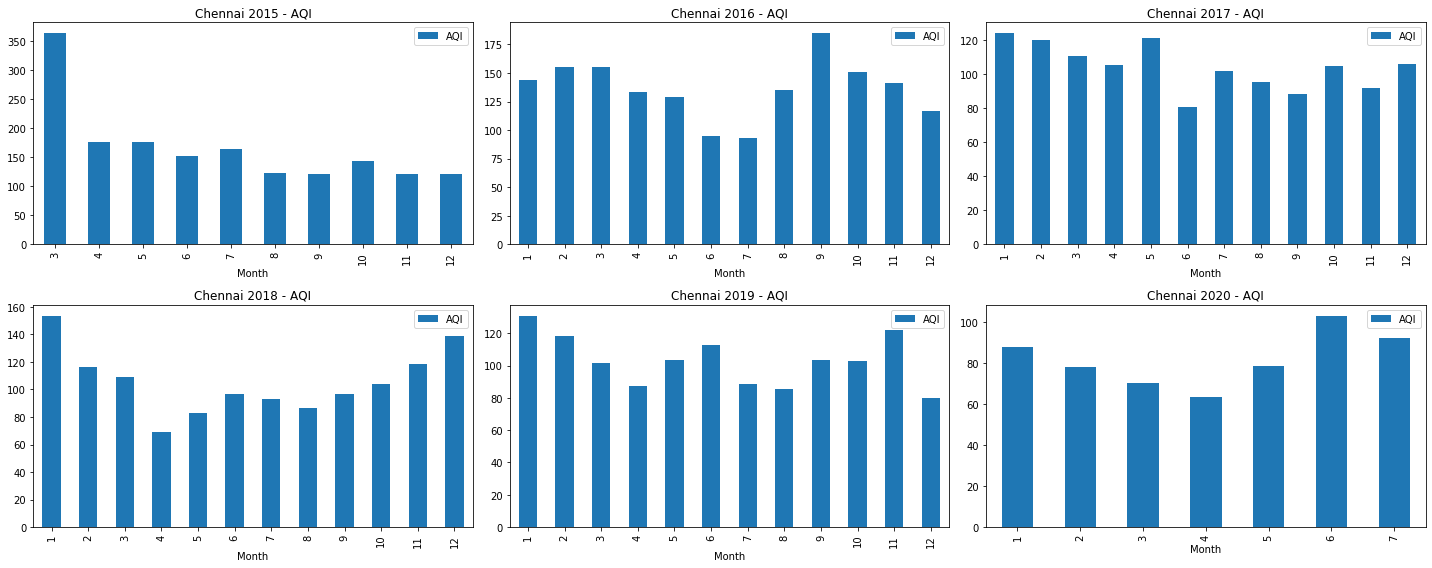

In [37]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (20,8))

ax1.title.set_text("Chennai 2015 - AQI")
chennai_2015.groupby(chennai_2015['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax1)

ax2.title.set_text("Chennai 2016 - AQI")
chennai_2016.groupby(chennai_2016['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax2)

ax3.title.set_text("Chennai 2017 - AQI")
chennai_2017.groupby(chennai_2017['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax3)

ax4.title.set_text("Chennai 2018 - AQI")
chennai_2018.groupby(chennai_2018['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax4)

ax5.title.set_text("Chennai 2019 - AQI")
chennai_2019.groupby(chennai_2019['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax = ax5)

ax6.title.set_text("Chennai 2020 - AQI")
chennai_2020.groupby(chennai_2020['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax = ax6)

plt.tight_layout()
plt.plot()

# Hyderabad AQI Year Analysis

In [38]:
hyderabad_2019 = hyderabad[hyderabad['Year'] == 2019]
hyderabad_2018 = hyderabad[hyderabad['Year'] == 2018]
hyderabad_2017 = hyderabad[hyderabad['Year'] == 2017]
hyderabad_2016 = hyderabad[hyderabad['Year'] == 2016]
hyderabad_2015 = hyderabad[hyderabad['Year'] == 2015]

[]

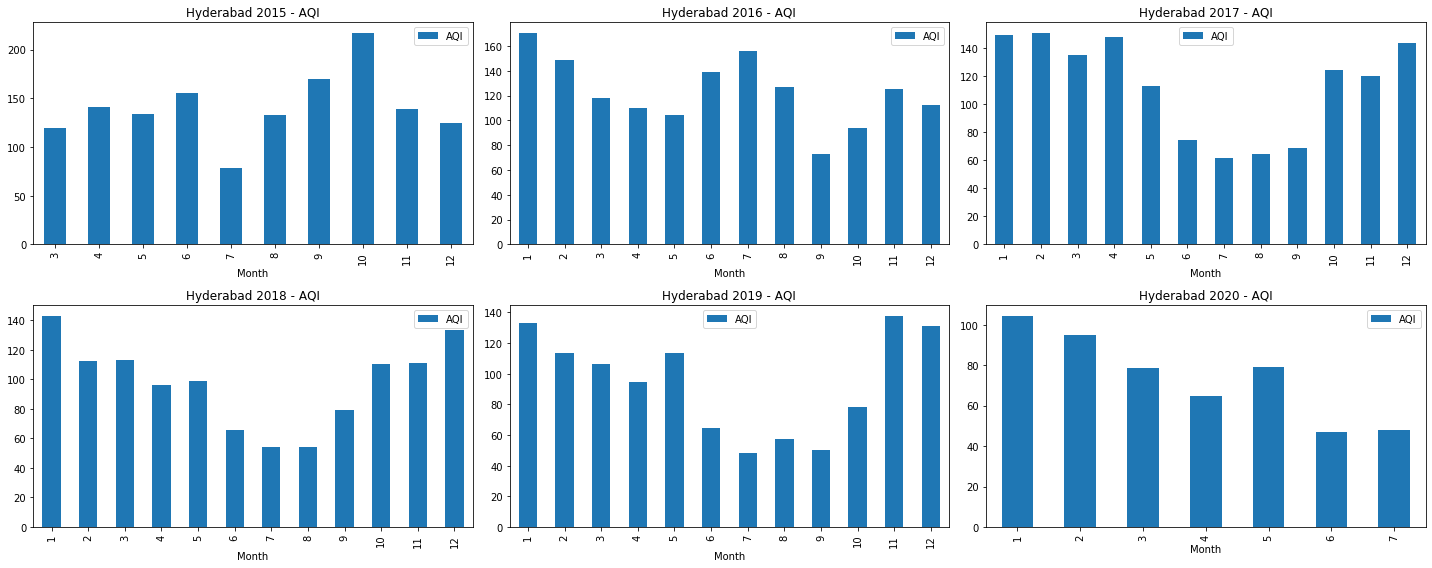

In [39]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (20,8))

ax1.title.set_text("Hyderabad 2015 - AQI")
hyderabad_2015.groupby(hyderabad_2015['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax1)

ax2.title.set_text("Hyderabad 2016 - AQI")
hyderabad_2016.groupby(hyderabad_2016['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax2)

ax3.title.set_text("Hyderabad 2017 - AQI")
hyderabad_2017.groupby(hyderabad_2017['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax3)

ax4.title.set_text("Hyderabad 2018 - AQI")
hyderabad_2018.groupby(hyderabad_2018['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax =ax4)

ax5.title.set_text("Hyderabad 2019 - AQI")
hyderabad_2019.groupby(hyderabad_2019['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax = ax5)

ax6.title.set_text("Hyderabad 2020 - AQI")
hyderabad_2020.groupby(hyderabad_2020['Month']).mean().plot(y = ['AQI'],kind = 'bar',ax = ax6)

plt.tight_layout()
plt.plot()